In [74]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
%matplotlib inline

In [84]:
train_df = pd.read_csv("/Users/sominwadhwa/Work/Kaggle_Data/Russian Housing Market/train.csv")
test_df = pd.read_csv("/Users/sominwadhwa/Work/Kaggle_Data/Russian Housing Market/test.csv")
macro_df = pd.read_csv("/Users/sominwadhwa/Work/Kaggle_Data/Russian Housing Market/macro.csv")

In [76]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


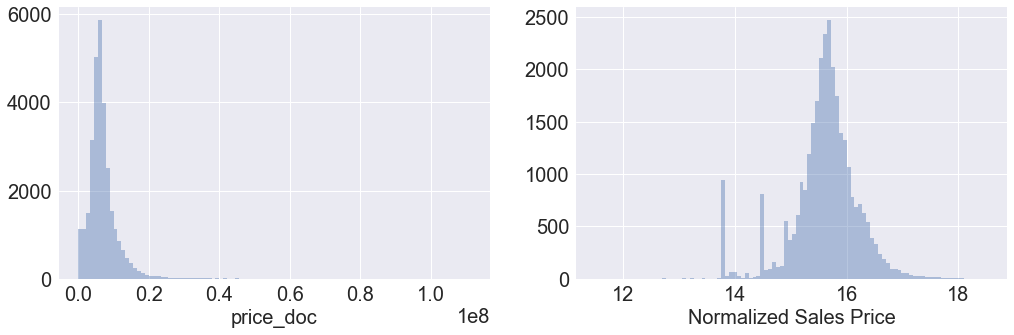

In [77]:
figure, (ax1, ax2) = plt.subplots(1,2,figsize = (17,5))
sns.distplot(train_df['price_doc'], kde = False, ax = ax1, bins = 100)
sns.distplot(np.log1p(train_df["price_doc"]), kde = False, axlabel = 'Normalized Sales Price', ax = ax2, bins = 100)

Distribution Obtained is clearly skewed & might require log/boxcox transfor while training (reg:linear & rmse) 

In [78]:
train_df.ix[np.random.choice(train_df.index, 10)]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
3242,3245,2012-08-18,45,30.0,5.0,NaN,NaN,NaN,NaN,NaN,...,11,2,0,10,16,0,2,66,6,5650000
8509,8512,2013-06-14,33,15.0,12.0,14.0,1.0,2003.0,1.0,7.0,...,2,1,0,2,8,1,0,20,2,5300000
14510,14513,2014-02-03,37,19.0,8.0,12.0,1.0,2005.0,1.0,6.0,...,1,1,0,5,9,0,2,17,6,5550000
3403,3406,2012-08-30,58,33.0,9.0,NaN,NaN,NaN,NaN,NaN,...,44,5,1,6,36,1,7,87,10,12000000
3087,3090,2012-07-31,36,17.0,25.0,NaN,NaN,NaN,NaN,NaN,...,371,141,26,150,249,2,105,203,13,3000000
6199,6202,2013-03-02,37,17.0,8.0,NaN,NaN,NaN,NaN,NaN,...,48,14,4,11,27,2,10,101,4,8600000
21254,21257,2014-08-04,73,44.0,4.0,16.0,1.0,1983.0,3.0,10.0,...,5,2,0,6,12,0,2,31,7,11230000
884,885,2012-01-21,38,35.0,1.0,NaN,NaN,NaN,NaN,NaN,...,21,12,0,10,21,1,4,66,1,6100000
1318,1321,2012-02-25,56,41.0,2.0,NaN,NaN,NaN,NaN,NaN,...,25,3,0,12,28,0,7,86,4,7700000
9754,9757,2013-08-12,44,27.0,1.0,4.0,2.0,1961.0,2.0,5.0,...,4,2,0,3,8,0,1,14,2,5150000


In [79]:
train_df.drop('id',axis=1, inplace=True)

In [80]:
X = train_df.drop('price_doc', axis=1)
Y = train_df['price_doc']
X.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,40,9,4,0,13,22,1,0,52,4
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,36,15,3,0,15,29,1,10,66,14
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,25,10,3,0,11,27,0,4,67,10
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,11,2,1,4,4,0,0,26,3
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,552,319,108,17,135,236,2,91,195,14


In [86]:
cols = [key for key in dict(train_df.dtypes) if dict(train_df.dtypes)[key] in ['float64', 'int64']]

In [87]:
cols

['build_count_1971-1995',
 'cafe_sum_3000_max_price_avg',
 '7_14_all',
 'museum_km',
 'water_km',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_500',
 'cafe_count_1500_na_price',
 'cafe_sum_500_min_price_avg',
 'detention_facility_km',
 'mosque_count_5000',
 'market_count_1500',
 'ID_metro',
 'green_zone_km',
 'cafe_count_1500',
 'trc_sqm_500',
 'cafe_sum_3000_min_price_avg',
 'basketball_km',
 'office_raion',
 'market_count_500',
 'church_synagogue_km',
 'trc_sqm_1500',
 'trc_count_3000',
 'additional_education_raion',
 'build_count_block',
 'mosque_count_3000',
 'life_sq',
 'office_km',
 'children_school',
 'cafe_count_2000',
 'leisure_count_1500',
 'cafe_count_5000_price_2500',
 'ID_big_road2',
 'trc_count_1500',
 'ID_railroad_terminal',
 '16_29_female',
 'mosque_km',
 'female_f',
 'shopping_centers_raion',
 'cafe_count_2000_price_1500',
 'prom_part_1500',
 'green_part_1000',
 'mosque_count_500',
 'trc_sqm_5000',
 'metro_min_avto',
 'build_count_before_1920',
 'ice_rink_km',
 'ca

In [82]:
cols = ['water_km','public_transport_station_min_walk','build_count_foam',
           'kitch_sq','market_shop_km','green_zone_part','green_zone_km','mosque_count_5000',
           'market_count_500','life_sq','office_km','shopping_centers_raion','school_km',
           'preschool_quota','school_quota','num_room']

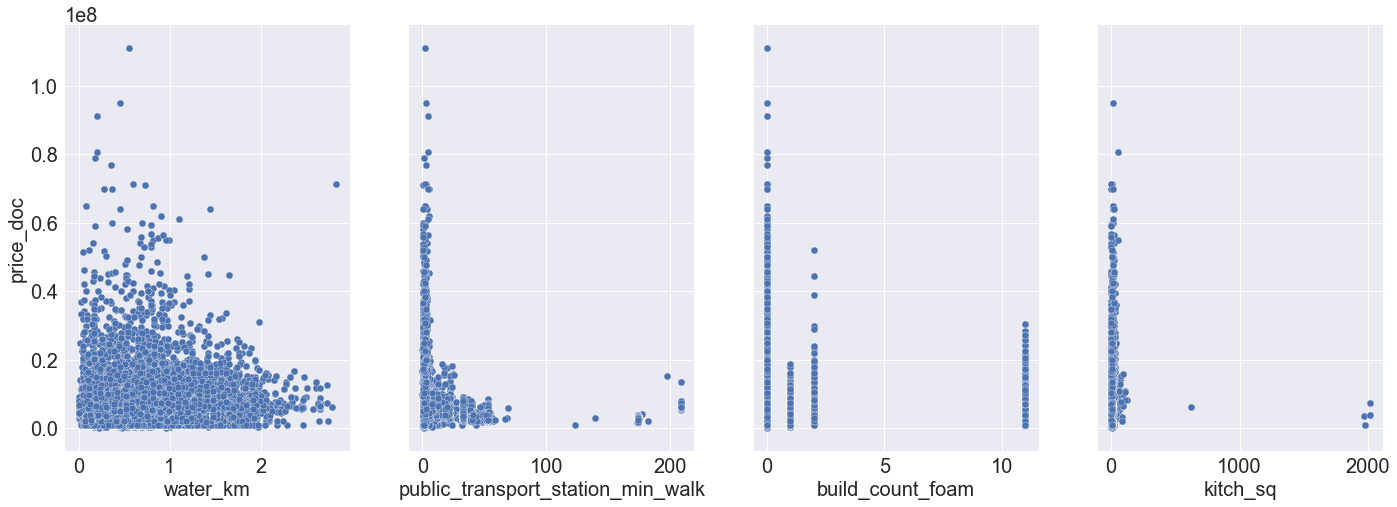

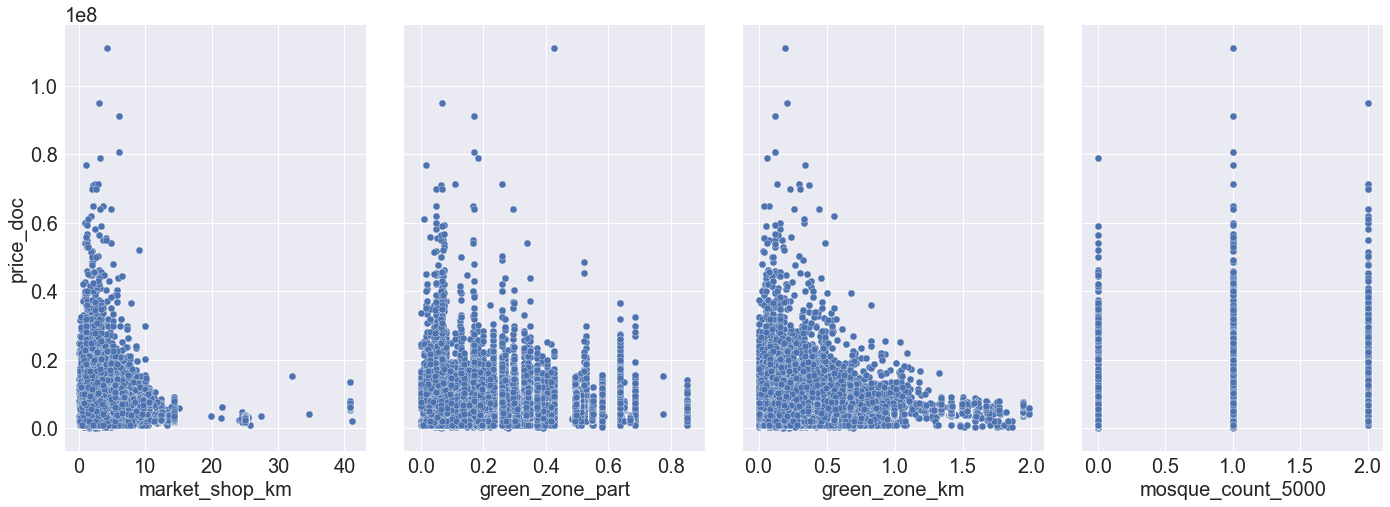

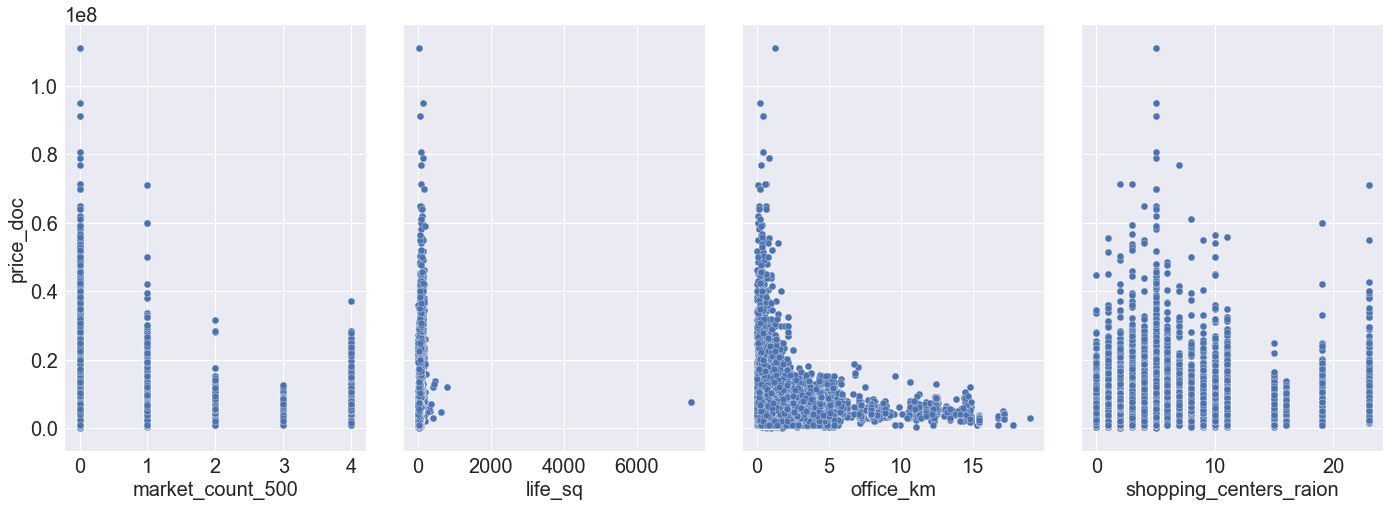

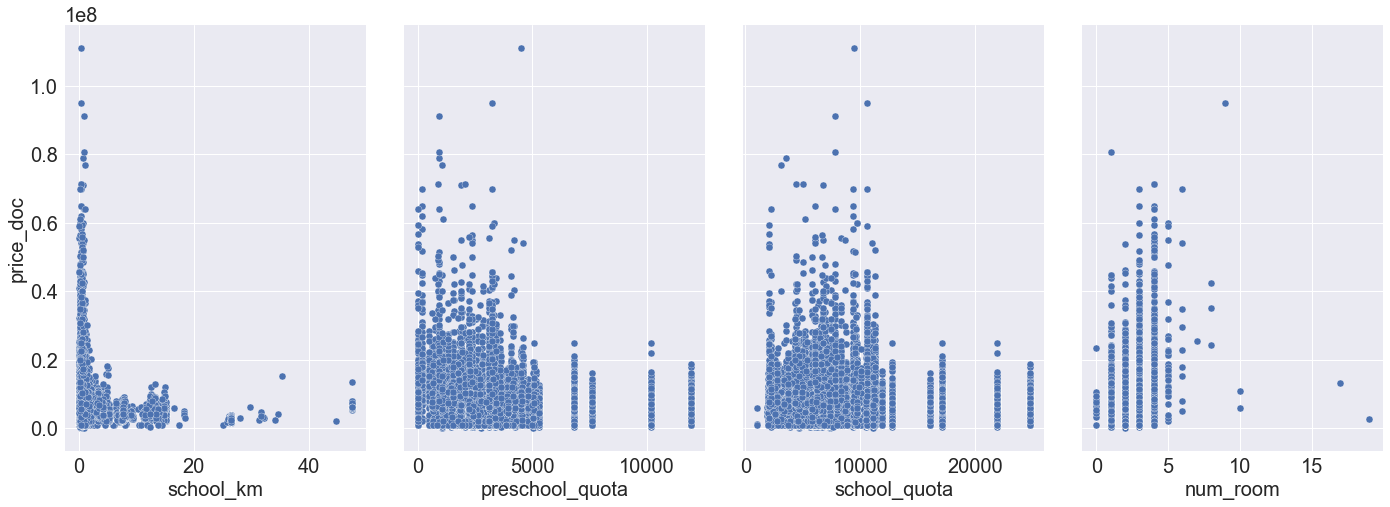

In [85]:
sns.pairplot(train_df, x_vars = cols[:4], y_vars = 'price_doc', size = 7, aspect = 0.7)
sns.pairplot(train_df, x_vars = cols[4:8], y_vars = 'price_doc', size = 7, aspect = 0.7)
sns.pairplot(train_df, x_vars = cols[8:12], y_vars = 'price_doc', size = 7, aspect = 0.7)
sns.pairplot(train_df, x_vars = cols[12:], y_vars = 'price_doc', size = 7, aspect = 0.7)

In [88]:
cols = [key for key in dict(train_df.dtypes) if dict(train_df.dtypes)[key] in ['object']]

In [89]:
cols

['nuclear_reactor_raion',
 'big_market_raion',
 'big_road1_1line',
 'oil_chemistry_raion',
 'detention_facility_raion',
 'product_type',
 'ecology',
 'radiation_raion',
 'thermal_power_plant_raion',
 'railroad_terminal_raion',
 'railroad_1line',
 'timestamp',
 'culture_objects_top_25',
 'sub_area',
 'incineration_raion',
 'water_1line']